In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(r"C:\Users\lll23\Documents\WXWork\1688857525503677\Cache\File\2024-03\57178.30.03.2021.30.03.2024.1.0.0.cn.utf8.00000000.xls",header=6)

In [11]:
np.unique(data["DD"])

array(['从东北偏东方向吹来的风', '从东北偏北方向吹来的风', '从东北方吹来的风', '从东南偏东方向吹来的风',
       '从东南偏南方向吹来的风', '从东南方吹来的风', '从东方吹来的风', '从北方吹来的风', '从南方吹来的风',
       '从西北偏北方向吹来的风', '从西北偏西方向吹来的风', '从西北方吹来的风', '从西南偏南方向吹来的风',
       '从西南偏西方向吹来的风', '从西南方吹来的风', '从西方吹来的风', '无风'], dtype=object)

In [12]:
replace_dic = {'从东北偏东方向吹来的风':"30", '从东北偏北方向吹来的风':"60", '从东北方吹来的风':"45", '从东南偏东方向吹来的风':"330",
       '从东南偏南方向吹来的风':"300", '从东南方吹来的风':"315", '从东方吹来的风':"0", '从北方吹来的风':"90", '从南方吹来的风':"270",
       '从西北偏北方向吹来的风':"120", '从西北偏西方向吹来的风':"150", '从西北方吹来的风':"135", '从西南偏南方向吹来的风':"240",
       '从西南偏西方向吹来的风':"210", '从西南方吹来的风':"225", '从西方吹来的风':"180", '无风':"11"}

In [13]:
data['DD'] = data['DD'].replace(replace_dic)
data['DD'] = data['DD'].astype('Int64')

In [14]:
data['ff3'] = data['ff3'].astype("Int64")

In [15]:
data['ff3'] = data['ff3'].fillna(0)

In [16]:
# 风向数据（角度）
wind_directions = data["DD"]
# 风速数据
wind_speeds = data['ff3']
# 将角度转换为弧度
theta = np.radians(wind_directions)
# 设置风速作为长度
r = wind_speeds
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

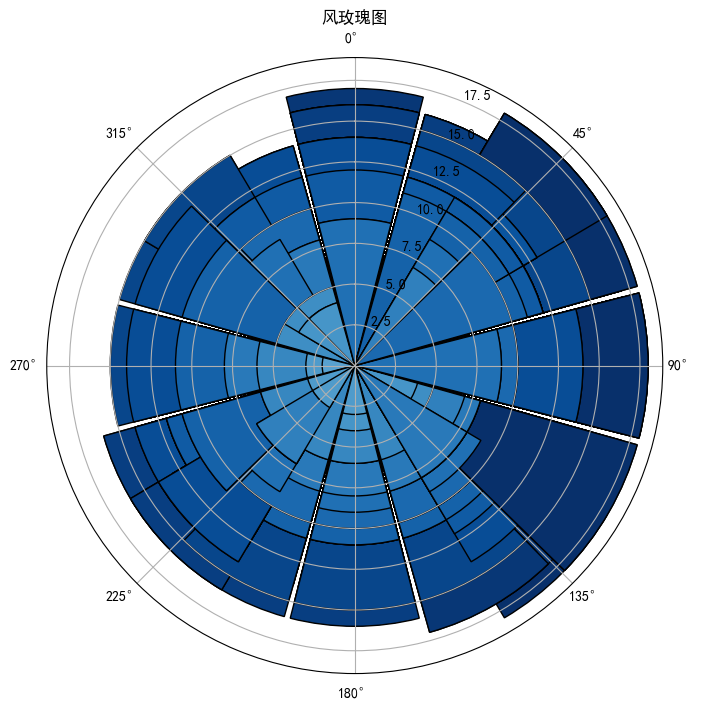

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 示例风向和频率数据
wind_directions = theta  # 随机生成风向数据
frequencies = r  # 随机生成频率数据

# 设置风玫瑰图
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# 绘制风玫瑰图
bars = ax.bar(wind_directions, frequencies, width=0.5, edgecolor='black', linewidth=1)

# 设置柱状图的颜色，频次高的风向颜色加深
max_frequency = max(frequencies)
for bar, frequency in zip(bars, frequencies):
    color_intensity = 0.5 + 0.5 * (frequency / max_frequency)  # 根据频率设置颜色深浅
    bar.set_facecolor(plt.cm.Blues(color_intensity))  # 使用蓝色颜色映射，并根据频率设置颜色深浅

# 添加标签和标题
ax.set_theta_direction(-1)  # 顺时针方向为正
ax.set_theta_zero_location('N')  # 设置北方为0度
plt.title('风玫瑰图')

# 显示风玫瑰图
plt.show()

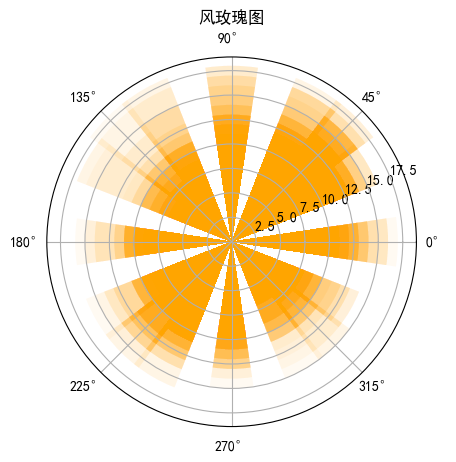

In [17]:
# 创建一个极坐标系
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# 绘制风玫瑰图
ax.bar(theta, r, width=0.3, color='orange', alpha=0.05)

# 添加标题
ax.set_title("风玫瑰图")

# 显示图表
plt.show()

In [62]:
date = pd.read_excel(r"C:\Users\lll23\Documents\WXWork\1688857525503677\Cache\File\2024-03\雷达图.xlsx")

In [3]:
date_1 = pd.read_excel(r"C:\Users\lll23\Documents\WXWork\1688857525503677\Cache\File\2024-03\公司雷达图.xlsx")
date_2 = pd.read_excel(r"C:\Users\lll23\Documents\WXWork\1688857525503677\Cache\File\2024-03\机场雷达图.xlsx")

In [7]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
date_1

,评分类型,2022,2023
0,销售服务,9.22,9.15
1,地面服务,8.91,8.82
2,空中服务,8.86,8.70
3,航班正常及延误后服务,8.77,8.49
4,总体满意度,8.94,8.80


In [5]:
date_2

,评分类型,2022,2023
0,值机与安检服务,9.07,9.02
1,地面交通服务,8.98,8.91
2,服务设施与商业,8.99,8.90
3,行李服务,8.90,8.83
4,离港与到港服务,8.93,8.83
5,航班正常及延误后服务,8.86,8.64
6,总体满意度,8.96,8.86


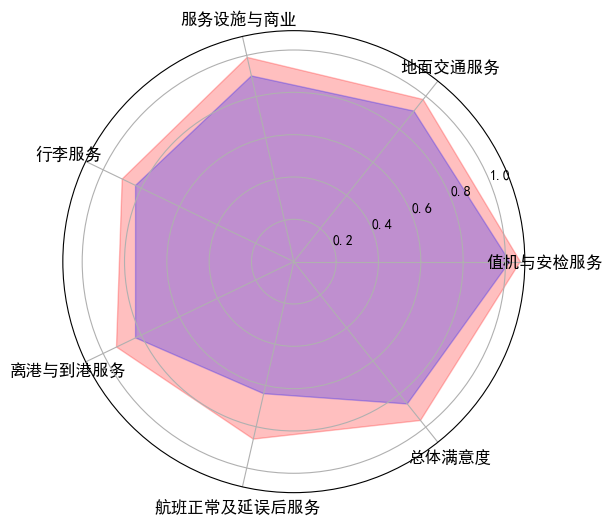

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 数据准备,改成date_1画另一个图
labels = date_2["评分类型"]
values1 = date_2.iloc[:,1]-8  # 第一组数据
values2 = date_2.iloc[:,2]-8  # 第二组数据

# 绘制雷达图
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
ax.fill(angles, values1, color='red', alpha=0.25)  # 绘制第一组数据
ax.fill(angles, values2, color='blue', alpha=0.25)  # 绘制第二组数据

ax.set_yticks([0.2,0.4,0.6,0.8,1])  # 设置雷达图的刻度
# ax.set_yticklabels(['1', '2', '3', '4', '5'], color='grey', size=10)  # 设置刻度标签

ax.set_xticks(angles)  # 设置角度标签
ax.set_xticklabels(labels, color='black', size=12)  # 设置文字标签

plt.show()
